In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n103        30.4908 (21.6210, 42.8396) (20.7162, 41.3623) 20.6462 (Jnode 202)\n',
 't_n104        24.9539 (18.8043, 34.3831) (18.0842, 33.1201) 15.0360 (Jnode 201)\n',
 't_n105        24.2959 (18.3758, 33.5174) (17.6881, 32.2780) 14.5899 (Jnode 200)\n',
 't_n106        21.4960 (16.6035, 29.8583) (15.9905, 28.7115) 12.7211 (Jnode 199)\n',
 't_n107        20.8057 (16.1290, 28.9802) (15.5923, 27.9208) 12.3286 (Jnode 198)\n',
 't_n108        19.1445 (14.9815, 26.7991) (14.4665, 25.7719) 11.3054 (Jnode 197)\n',
 't_n109        10.6804 ( 7.5160, 15.0906) ( 7.1811, 14.5821)  7.4010 (Jnode 196)\n',
 't_n110        10.5902 ( 7.4509, 14.9582) ( 7.1154, 14.4521)  7.3367 (Jnode 195)\n',
 't_n111        10.3222 ( 7.2639, 14.5712) ( 6.9195, 14.0650)  7.1455 (Jnode 194)\n',
 't_n112         9.9729 ( 7.0176, 14.0732) ( 6.7270, 13.6192)  6.8923 (Jnode 193)\n',
 't_n113         9.4371 ( 6.6270, 13.3265) ( 6.3508, 12.8906)  6.5398 (Jnode 192)\n',
 't_n114         6.9341 ( 4.4169, 10.2236) ( 4.1661,  

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [20]:
posterior_mean_iqtree

[30.4908,
 24.9539,
 24.2959,
 21.496,
 20.8057,
 19.1445,
 10.6804,
 10.5902,
 10.3222,
 9.9729,
 9.4371,
 6.9341,
 2.8678,
 1.8157,
 3.5896,
 6.907,
 5.6163,
 9.8264,
 9.3421,
 5.9779,
 4.7345,
 1.8082,
 3.9101,
 9.0283,
 8.3903,
 2.5812,
 10.0901,
 9.0645,
 5.7151,
 4.9553,
 5.7838,
 3.0452,
 2.262,
 4.4471,
 17.9811,
 12.117,
 19.4319,
 16.4304,
 12.1639,
 10.0661,
 7.9202,
 6.8012,
 4.2236,
 1.9352,
 1.4022,
 14.9526,
 12.984,
 4.7532,
 1.7322,
 23.0201,
 19.4922,
 13.1241,
 6.5723,
 15.4802,
 3.9456,
 10.7202,
 4.9568,
 24.3217,
 21.874,
 15.7925,
 8.1614,
 6.9632,
 5.6649,
 3.5165,
 17.3649,
 9.1798,
 13.7664,
 17.3041,
 16.5502,
 16.1707,
 15.3361,
 14.0158,
 13.5138,
 13.0129,
 12.3042,
 11.1014,
 9.6468,
 5.7244,
 7.1992,
 3.9448,
 3.5144,
 3.3873,
 12.4293,
 11.1626,
 10.5289,
 8.7083,
 4.6675,
 10.479,
 8.2998,
 3.9638,
 13.477,
 12.2599,
 7.8214,
 7.259,
 1.7738,
 5.6527,
 6.736,
 5.4326,
 2.0006,
 16.7091,
 8.2432]

In [21]:
lower_ci_iqtree

[]

In [22]:
upper_ci_iqtree

[]

In [23]:
file_LG = open("LG_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [25]:
posterior_mean_baseml

[29.8042,
 25.0623,
 24.037,
 21.6059,
 20.69,
 18.5833,
 11.3036,
 11.1613,
 10.601,
 10.0146,
 9.4043,
 6.9143,
 2.9948,
 1.7355,
 3.609,
 6.9728,
 5.4468,
 9.919,
 9.2717,
 5.984,
 4.6631,
 1.7629,
 3.8255,
 9.0772,
 8.2531,
 2.8756,
 10.4484,
 9.2455,
 5.9791,
 4.9244,
 5.8316,
 3.0242,
 2.2104,
 4.933,
 17.0416,
 12.279,
 18.9874,
 15.8868,
 12.0048,
 9.6343,
 7.3084,
 6.7816,
 4.1262,
 1.8736,
 1.3411,
 14.2787,
 12.1406,
 4.4084,
 1.6476,
 22.1001,
 18.4576,
 12.9481,
 6.4999,
 14.7705,
 3.7322,
 9.8967,
 4.4901,
 24.4158,
 21.8106,
 15.6556,
 8.3425,
 7.0506,
 5.5187,
 3.4894,
 17.7961,
 8.9658,
 13.8908,
 19.5801,
 18.3205,
 17.32,
 16.2771,
 14.6629,
 13.9876,
 13.2139,
 12.3315,
 10.897,
 9.0464,
 5.4627,
 7.3775,
 4.0927,
 3.3948,
 3.4296,
 12.1793,
 10.7033,
 9.9363,
 8.0454,
 4.1308,
 9.8791,
 7.8444,
 3.8566,
 13.7812,
 12.2423,
 7.7249,
 6.8041,
 1.7257,
 6.0808,
 7.7773,
 5.9134,
 2.3217,
 18.6193,
 9.159]

In [26]:
posterior_mean_iqtree

[30.4908,
 24.9539,
 24.2959,
 21.496,
 20.8057,
 19.1445,
 10.6804,
 10.5902,
 10.3222,
 9.9729,
 9.4371,
 6.9341,
 2.8678,
 1.8157,
 3.5896,
 6.907,
 5.6163,
 9.8264,
 9.3421,
 5.9779,
 4.7345,
 1.8082,
 3.9101,
 9.0283,
 8.3903,
 2.5812,
 10.0901,
 9.0645,
 5.7151,
 4.9553,
 5.7838,
 3.0452,
 2.262,
 4.4471,
 17.9811,
 12.117,
 19.4319,
 16.4304,
 12.1639,
 10.0661,
 7.9202,
 6.8012,
 4.2236,
 1.9352,
 1.4022,
 14.9526,
 12.984,
 4.7532,
 1.7322,
 23.0201,
 19.4922,
 13.1241,
 6.5723,
 15.4802,
 3.9456,
 10.7202,
 4.9568,
 24.3217,
 21.874,
 15.7925,
 8.1614,
 6.9632,
 5.6649,
 3.5165,
 17.3649,
 9.1798,
 13.7664,
 17.3041,
 16.5502,
 16.1707,
 15.3361,
 14.0158,
 13.5138,
 13.0129,
 12.3042,
 11.1014,
 9.6468,
 5.7244,
 7.1992,
 3.9448,
 3.5144,
 3.3873,
 12.4293,
 11.1626,
 10.5289,
 8.7083,
 4.6675,
 10.479,
 8.2998,
 3.9638,
 13.477,
 12.2599,
 7.8214,
 7.259,
 1.7738,
 5.6527,
 6.736,
 5.4326,
 2.0006,
 16.7091,
 8.2432]

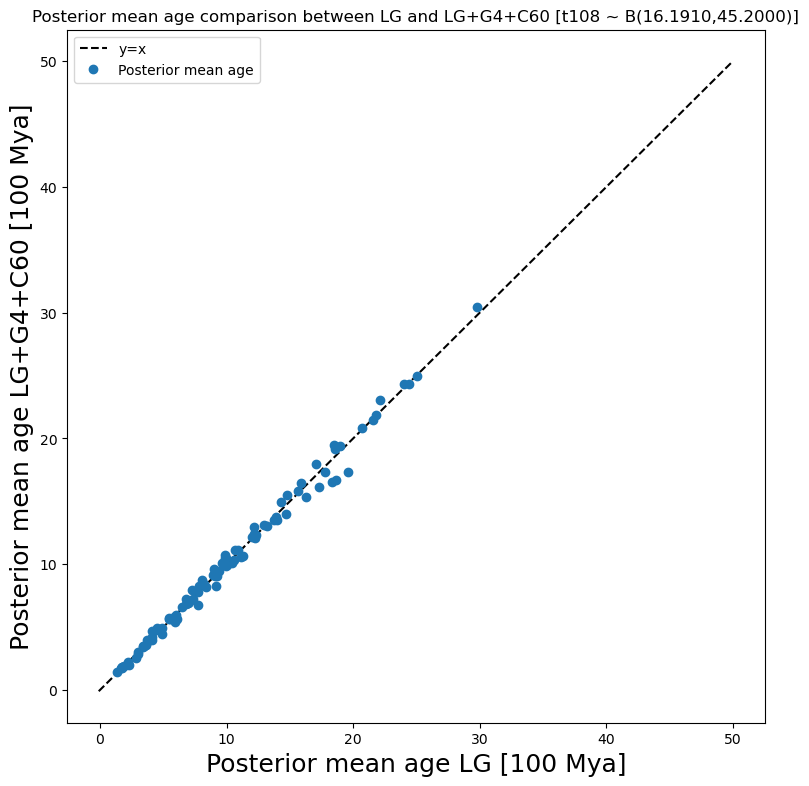

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_middle_scatter.png')

In [28]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')